<a id="basic"></a>
# <b><span style='color:#white; font-size:40%' >INTRODUCTION|</span></b>


One of the biggest frustrations these days is flight delays. In the following dataset we have information on US domestic flights between January-June 2024 with variables such as: when the flights depart, the scheduled and actual arrival time, how long they are delayed, reasons for the delay, etc.

We will do a Machine Learning project to predict which flights will arrive late to the destination and by how many minutes.



<a id="basic"></a>
# <b><span style='color:#white; font-size:40%' >SUMMARY|</span></b>

<a id="contents_tabel"></a>    
<div style="border-radius:10px; padding: 15px; background-color: #049#0A1172; font-size:100%; text-align:left">


* [Step 1 | Overview](#overview)
    - Step 1.1 |  Data
    - Step 1.2 | Variables
* [Step 2 | Dataset](#read)
   - Step 2.1 | Libraries
   - Step 2.2 | Dataset Information
        - Step 2.2.1 | Dataset Information | Treatment of Nulls
        - Step 2.2.2 | Dataset Information | Treatment of Variables
* [Step 3 | Machine Learning](#data)
    - Step 3.1 | Split & Test
        - Step 3.2.1 | Split & Test | Split & Test
        - Step 3.2.2 | Split & Test | Target
    - Step 3.2 | Mini EDA
        - Step 3.2.1 | Mini EDA | Division of categorical and numerical variables
        - Step 3.2.2 | Mini EDA | Categorical columns
        - Step 3.2.3 | Mini EDA | Numerical Columns
            + Step 3.2.3.1 | Mini EDA | Numerical Columns | Treatment of Numerical Columns 
    - Step 3.3 | Scaling
    - Step 3.4 | Modeling
        - Step 3.4.1 | Modeling | Random Forest
        - Step 3.4.2 | Modeling | XGBoost
        - Step 3.4.3 | Modeling | LightGBM
        - Step 3.4.4 | Modeling | Best Model
    - Step 3.5 | Graphs
        - Step 3.5.1 | Graphs | Real vs Prediction
        - Step 3.5.2 | Graphs | Distribution of residuals

* [Step 4 | Data Analysis](#CONCLUSION)
     - Step 4.1 | Data Analysis
     - Step 4.2 | Conclusions
  

<a id="overview"></a>
# <p style="background-color:#0A1172; font-family:calibri; color:white; font-size:80%; text-align:center; border-radius:15px 50px;">Step 1 | Overview</p>
⬆️ [Tabel of Contents](#contents_tabel

<a id="basic"></a>
# <b><span style='color:#white; font-size:40%' >Step 1.1 |</span><span style='color:#0492C2; font-size:40%' > DATA</span></b>

The Raw data has been taken from Bureau of Transportation Statistics from US Department of Transportation.

https://www.transtats.bts.gov/DL_SelectFields.aspx?gnoyr_VQ=FGJ&QO_fu146_anzr=b0-gvzr

<a id="basic"></a>
# <b><span style='color:#white; font-size:40%' >Step 1.2 |</span><span style='color:#0492C2; font-size:40%' > VARIABLES</span></b>

| __Variable__ | __Description__ |
|     :---      |       :---      |      
| __MONTH__ | Month of the Year |                   
| __DAY_OF_MONTH__ | The day of the month on which the flight took place, represented by an integer from 1 to 31 |
| __DAY_OF_WEEK__ | The day of the week on which the flight took place. |
| __OP_UNIQUE_CARRIER__ | Unique Carrier Code. When the same code has been used by multiple carriers, a numeric suffix is used for earlier users, for example, PA, PA(1), PA(2). Use this field for analysis across a range of years. |                     
| __ORIGIN_CITY_NAME__ | Origin Airport, City Name. |  
| __DEST_CITY_NAME__ | Destination Airport, City Name |                      
| __CRS_DEP_TIME__ | The scheduled departure time of the flight, (local time: hhmm) |
| __DEP_TIME__ |  Actual Departure Time (local time: hhmm) |
| __DEP_DELAY__ |  Difference in minutes between scheduled and actual departure time. Early departures show negative numbers. |
| __DEP_DELAY_NEW__ | Difference in minutes between scheduled and actual departure time. Early departures set to 0.   |
| __DEP_DEL15__ | Departure Delay Indicator, 15 Minutes or More (1=Yes)   |                
| __TAXI_OUT__ | Taxi Out Time, in Minutes |              
| __TAXI_IN__ | Taxi In Time, in Minutes |                      
| __CRS_ARR_TIME__ | The scheduled arrival time of the flight (local time: hhmm) |
| __ARR_TIME__ | Actual Arrival Time (local time: hhmm) |
| __CARRIER_DELAY__ | Carrier Delay, in Minutes | 
| __WEATHER_DELAY__ | Weather Delay, in Minutes | 
| __NAS_DELAY__ | National Air System Delay, in Minutes | 
| __SECURITY_DELAY__ | 	Security Delay, in Minutes | 
| __LATE_AIRCRAYFT_DELA__ | Late Aircraft Delay, in Minutes | 

<a id="read"></a>
# <p style="background-color:#0A1172; font-family:calibri; color:white; font-size:80%; text-align:center; border-radius:15px 50px;">Step 2 | DATASET</p>
⬆️ [Tabel of Contents](#contents_tabel)

<a id="basic"></a>
# <b><span style='color:#white; font-size:40%' >Step 2.1 |</span><span style='color:#0492C2; font-size:40%' > LIBRARIES</span></b>

In [2]:
#Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pickle
import warnings
import lightgbm as lgb
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, balanced_accuracy_score, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import shapiro
from pandas.api.types import is_numeric_dtype
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import KFold
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
import lightgbm as lgb
import matplotlib.pyplot as plt



<a id="basic"></a>
# <b><span style='color:#white; font-size:40%' >Step 2.2 |</span><span style='color:#0492C2; font-size:40%' > DATASET INFORMATION</span></b>

In [3]:
files = ["C:/Users/marta/Downloads/EDA/Datos/january.csv", "C:/Users/marta/Downloads/EDA/Datos/february.csv","C:/Users/marta/Downloads/EDA/Datos/march.csv", "c:/Users/marta/Downloads/EDA/Datos/april.csv", "c:/Users/marta/Downloads/EDA/Datos/may.csv", "C:/Users/marta/Downloads/EDA/Datos/june.csv"]
dfs = [pd.read_csv(data, sep=";") for data in files]
df_flights = pd.concat(dfs, ignore_index=True)
df_flights= df_flights.drop(df_flights.columns[[15, 16, 17]], axis=1)

df_flights.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,ORIGIN_CITY_NAME,DEST_CITY_NAME,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,TAXI_OUT,TAXI_IN,CRS_ARR_TIME,ARR_TIME,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,January,1,Monday,9E,"Albany, NY","New York, NY",700,650.0,-10.0,0.0,0.0,10.0,10.0,820,737.0,NaN,NaN,NaN,NaN,NaN
1,January,1,Monday,9E,"Alexandria, LA","Atlanta, GA",600,555.0,-5.0,0.0,0.0,10.0,8.0,850,821.0,NaN,NaN,NaN,NaN,NaN
2,January,1,Monday,9E,"Alexandria, LA","Atlanta, GA",1631,1620.0,-11.0,0.0,0.0,16.0,6.0,1917,1851.0,NaN,NaN,NaN,NaN,NaN
3,January,1,Monday,9E,"Allentown/Bethlehem/Easton, PA","Atlanta, GA",600,558.0,-2.0,0.0,0.0,9.0,8.0,832,757.0,NaN,NaN,NaN,NaN,NaN
4,January,1,Monday,9E,"Allentown/Bethlehem/Easton, PA","Atlanta, GA",1231,1240.0,9.0,9.0,0.0,13.0,5.0,1450,1437.0,NaN,NaN,NaN,NaN,NaN


In [4]:
#Remove the variables that will not be useful in the analysis.
df_flights.drop(['DEP_TIME','DEP_DELAY','DEP_DELAY_NEW','DEP_DEL15','TAXI_OUT','TAXI_IN','CARRIER_DELAY','WEATHER_DELAY','NAS_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY'], axis=1, inplace=True)
df_flights.drop(columns='OP_UNIQUE_CARRIER', axis=1, inplace=True)


<a id="basic"></a>
# <b><span style='color:#white; font-size:40%' >Step 2.2.1 |</span><span style='color:#0492C2; font-size:40%' > DATASET INFORMATION |</span><span style='color:#63C5DA; font-size:35%' > Treatment of nulls</span></b>

In [5]:
# Detect nulls and values ​​that may cause errors in the future
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3461319 entries, 0 to 3461318
Data columns (total 8 columns):
 #   Column            Dtype  
---  ------            -----  
 0   MONTH             object 
 1   DAY_OF_MONTH      int64  
 2   DAY_OF_WEEK       object 
 3   ORIGIN_CITY_NAME  object 
 4   DEST_CITY_NAME    object 
 5   CRS_DEP_TIME      int64  
 6   CRS_ARR_TIME      int64  
 7   ARR_TIME          float64
dtypes: float64(1), int64(3), object(4)
memory usage: 211.3+ MB


- The dataset contains 3,461,318 entries (rows) and 8 columns.
- The columns are of different data types:
   - integer (int64 (3))
   - float (float64(1))
   - object (4).

In [6]:
# Check how many nulls there are and in which variables are located.
df_flights.isnull().sum()

MONTH                   0
DAY_OF_MONTH            0
DAY_OF_WEEK             0
ORIGIN_CITY_NAME        0
DEST_CITY_NAME          0
CRS_DEP_TIME            0
CRS_ARR_TIME            0
ARR_TIME            49510
dtype: int64

With the above information we can see that:


- There are 49,510 __`cancelled`__ flights, with no __`ARR_TIME`__. We proceed to delete these  flights as will not have delete time
- Rest of the flights with no reason for delay (NAN) will be count as zero.

With that said, we will proceed to change NaN to zero

In [7]:
# Replace all NaN with cero
df_flights.fillna(0,inplace=True)
df_flights.isnull().sum()

MONTH               0
DAY_OF_MONTH        0
DAY_OF_WEEK         0
ORIGIN_CITY_NAME    0
DEST_CITY_NAME      0
CRS_DEP_TIME        0
CRS_ARR_TIME        0
ARR_TIME            0
dtype: int64

<a id="basic"></a>
# <b><span style='color:#white; font-size:40%' >Step 2.2.3 |</span><span style='color:#0492C2; font-size:40%' > DATASET INFORMATION |</span><span style='color:#63C5DA; font-size:35%' > Treatment of variables</span></b>

The variables "MONTH" and "DAY_OF_WEEK" are written. For better management and optimization of the variables we will transform them into numbers

In [8]:
# We transform days of the week into numbers
day_map = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7
}
df_flights['DAY_OF_WEEK'] = df_flights['DAY_OF_WEEK'].map(lambda x:day_map[x])

In [9]:
# We transform month into numbers
month_map = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
}
df_flights['MONTH'] = df_flights['MONTH'].map(lambda x:month_map[x])

<a id="read"></a>
# <p style="background-color:#0A1172; font-family:calibri; color:white; font-size:80%; text-align:center; border-radius:15px 50px;">Step 3 | MACHINE LEARNING</p>
⬆️ [Tabel of Contents](#contents_tabel)

<a id="basic"></a>
# <b><span style='color:#white; font-size:40%' >Step 3.1 |</span><span style='color:#0492C2; font-size:40%' > SPLIT & TEST</span></b>

<a id="basic"></a>
# <b><span style='color:#white; font-size:40%' >Step 3.1.1 |</span><span style='color:#0492C2; font-size:40%' > Split & Test |</span><span style='color:#63C5DA; font-size:35%' > Split & Test </span></b>

Identification of the target variable and split in train and test set.

We split the data into training and test sets

- 0.2 indicates that 20% of the data will be reserved for the test set
- 80% will be used for training.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df_flights, df_flights['ARR_TIME'], test_size=0.2, random_state=42)

print('Longitud de Train -->', len(X_train))
print('Longitud de Test -->', len(X_test))
print('Longitud de Train -->', len(y_train))
print('Longitud de Test -->', len(y_test))

Longitud de Train --> 2769055
Longitud de Test --> 692264
Longitud de Train --> 2769055
Longitud de Test --> 692264


<a id="basic"></a>
# <b><span style='color:#white; font-size:40%' >Step 3.1.2 |</span><span style='color:#0492C2; font-size:40%' > Split & Test |</span><span style='color:#63C5DA; font-size:35%' > Target </span></b>

We define the target ( 'ARR_TIME'), which means that the model-analysis will focus on predicting this variable.

In [11]:
target = 'ARR_TIME'

We proceed to make a histogram, it is a useful tool to understand the distribution of the target data, and to have a clear vision of how the target behaves.

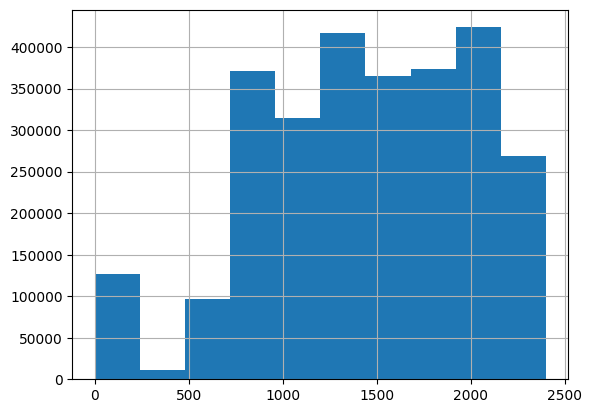

In [12]:
X_train[target].hist();

We found that the distribution of the target variable is not Gaussian.

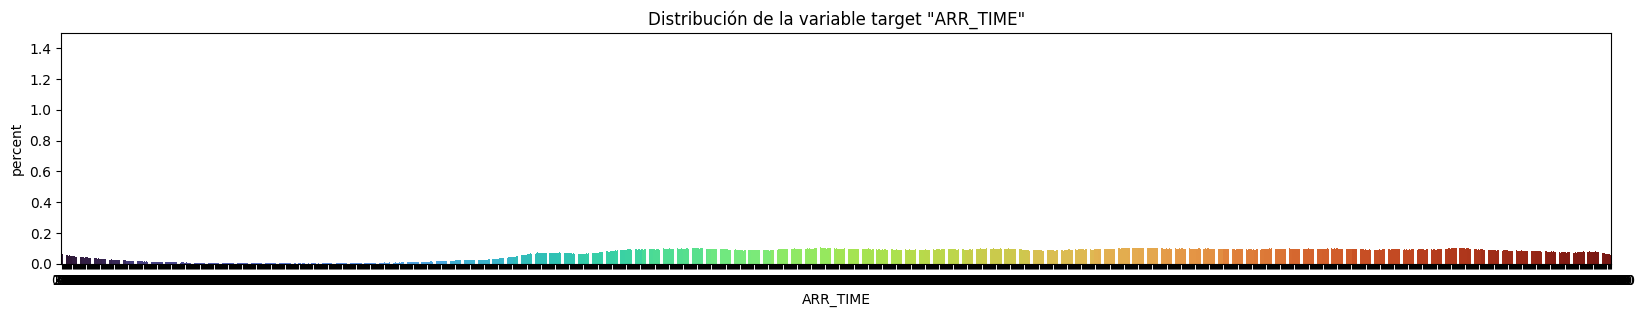

In [13]:
plt.figure(figsize=(20,3))
sns.countplot(X_train, x=target, legend=False, hue=target, stat='percent', palette='turbo')
plt.title('Distribución de la variable target "ARR_TIME"');

In [14]:
X_train[target].describe()

count    2.769055e+06
mean     1.443656e+03
std      5.719690e+02
min      0.000000e+00
25%      1.033000e+03
50%      1.458000e+03
75%      1.920000e+03
max      2.400000e+03
Name: ARR_TIME, dtype: float64

- __`ARR_TIME `__ has a wide distribution, with a mean  1463 minutes (around 24h) and a standard deviation of 570 minutes, suggesting that flight arrivals are spread throughout the day.

- The minimum is 0 and the maximum is 2400. These extreme values are noteworthy.


<a id="basic"></a>
# <b><span style='color:#white; font-size:40%' >Step 3.2 |</span><span style='color:#0492C2; font-size:40%' > MINI EDA</span></b>

<a id="basic"></a>
# <b><span style='color:#white; font-size:40%' >Step 3.2.1 |</span><span style='color:#0492C2; font-size:40%' > MINI EDA |</span><span style='color:#63C5DA; font-size:35%' > Division of categorical and numerical variables</span></b>

We are going to classify variables according to their type (CATERGORICAL or NUMERICAL). Once we visualize their distribution, we will see how we will encode some of the discrete numerical variables.
The target should not be part of the predictor variables. Therefore, now that we have it defined, t, we will remove it from the numerical and categorical variables.

In [15]:
def clasificar_variable(nombre):
    # Variables
    if nombre in ["MONTH", "DAY_OF_WEEK", "ORIGIN_CITY_NAME", "DEST_CITY_NAME", "DEP_DEL15"]:
        return "Categórica"
    elif nombre in ["DAY_OF_MONTH", "DEP_DELAY", "DEP_DELAY_NEW", "TAXI_OUT", "TAXI_IN",
                    "CRS_DEP_TIME", "DEP_TIME", "CRS_ARR_TIME", 
                    "CARRIER_DELAY", "WEATHER_DELAY", "NAS_DELAY", "SECURITY_DELAY", "LATE_AIRCRAYFT_DELAY"]:
        return "Numérica Discreta"
    else:
        return "Otra"

# DF
variables = {
    "MONTH", "DAY_OF_MONTH", "DAY_OF_WEEK", "ORIGIN_CITY_NAME", "DEST_CITY_NAME",
    "CRS_DEP_TIME", "DEP_TIME", "DEP_DELAY", "DEP_DELAY_NEW", "DEP_DEL15", "TAXI_OUT", "TAXI_IN",
    "CRS_ARR_TIME", "CARRIER_DELAY", "WEATHER_DELAY", "NAS_DELAY", "SECURITY_DELAY", "LATE_AIRCRAYFT_DELA"
}

categorizacion = {var: clasificar_variable(var) for var in variables}

def listado_categorias(categorizacion, tipos):
    return [var for var, tipo in categorizacion.items() if tipo in tipos]



In [16]:
# Final classification of variables into categorical and numerical
var_cat = listado_categorias(categorizacion, ['Categórica', 'Binaria'])
var_num = listado_categorias(categorizacion, ['Numérica Discreta', 'Numérica Continua'])

print('Variables categóricas:', '\n', var_cat)
print('Variables numéricas:', '\n', var_num)

Variables categóricas: 
 ['DEST_CITY_NAME', 'DEP_DEL15', 'MONTH', 'ORIGIN_CITY_NAME', 'DAY_OF_WEEK']
Variables numéricas: 
 ['SECURITY_DELAY', 'TAXI_IN', 'DEP_DELAY_NEW', 'TAXI_OUT', 'DEP_DELAY', 'WEATHER_DELAY', 'DAY_OF_MONTH', 'CARRIER_DELAY', 'DEP_TIME', 'CRS_DEP_TIME', 'CRS_ARR_TIME', 'NAS_DELAY']


<a id="basic"></a>
# <b><span style='color:#white; font-size:40%' >Step 3.2.2 |</span><span style='color:#0492C2; font-size:40%' > MINI EDA |</span><span style='color:#63C5DA; font-size:35%' > Categorical Columns</span></b>

We will analyze the variables according to whether they are categorical or numerical.

In [17]:
# Turn into a list to access DF with it
var_cat_flat = [col for lista in var_cat for col in lista]
var_cat

['DEST_CITY_NAME', 'DEP_DEL15', 'MONTH', 'ORIGIN_CITY_NAME', 'DAY_OF_WEEK']

In [18]:
var_cat = ['MONTH', 'ORIGIN_CITY_NAME','DEST_CITY_NAME']  

desc = X_train[var_cat].describe(include='object')
missing = X_train[var_cat].isnull().sum()
cardinality = X_train[var_cat].nunique()

summary = pd.DataFrame({
    'Count': desc.loc['count'], #non-null values.
    'Unique': desc.loc['unique'],#unique values.
    'Top': desc.loc['top'], #most frequent values.
    'Freq': desc.loc['freq'],#Frequency of the most frequent value.
    'Missing': missing, # missing
    'Cardinality': cardinality #cardinality
})
print(summary)

                    Count Unique          Top    Freq  Missing  Cardinality
DEST_CITY_NAME    2769055    337  Chicago, IL  139261        0          337
MONTH                 NaN    NaN          NaN     NaN        0            6
ORIGIN_CITY_NAME  2769055    337  Chicago, IL  138947        0          337


- Chicago, IL has the highest number of flights for both origin (136,745) and destination (136,333).


<a id="basic"></a>
# <b><span style='color:#white; font-size:40%' >Step 3.2.2 |</span><span style='color:#0492C2; font-size:40%' > MINI EDA |</span><span style='color:#63C5DA; font-size:35%' > Numerical Columns</span></b>

In [19]:
#Identify numeric columns for further analysis, transformation, or elimination.
var_num = [col for col in X_train.columns if col != target and is_numeric_dtype(X_train[col])]
var_num

['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'CRS_DEP_TIME', 'CRS_ARR_TIME']

We make a histogram for the distributions and relationships between the numerical columns  and we identify possible redundant or highly correlated columns.

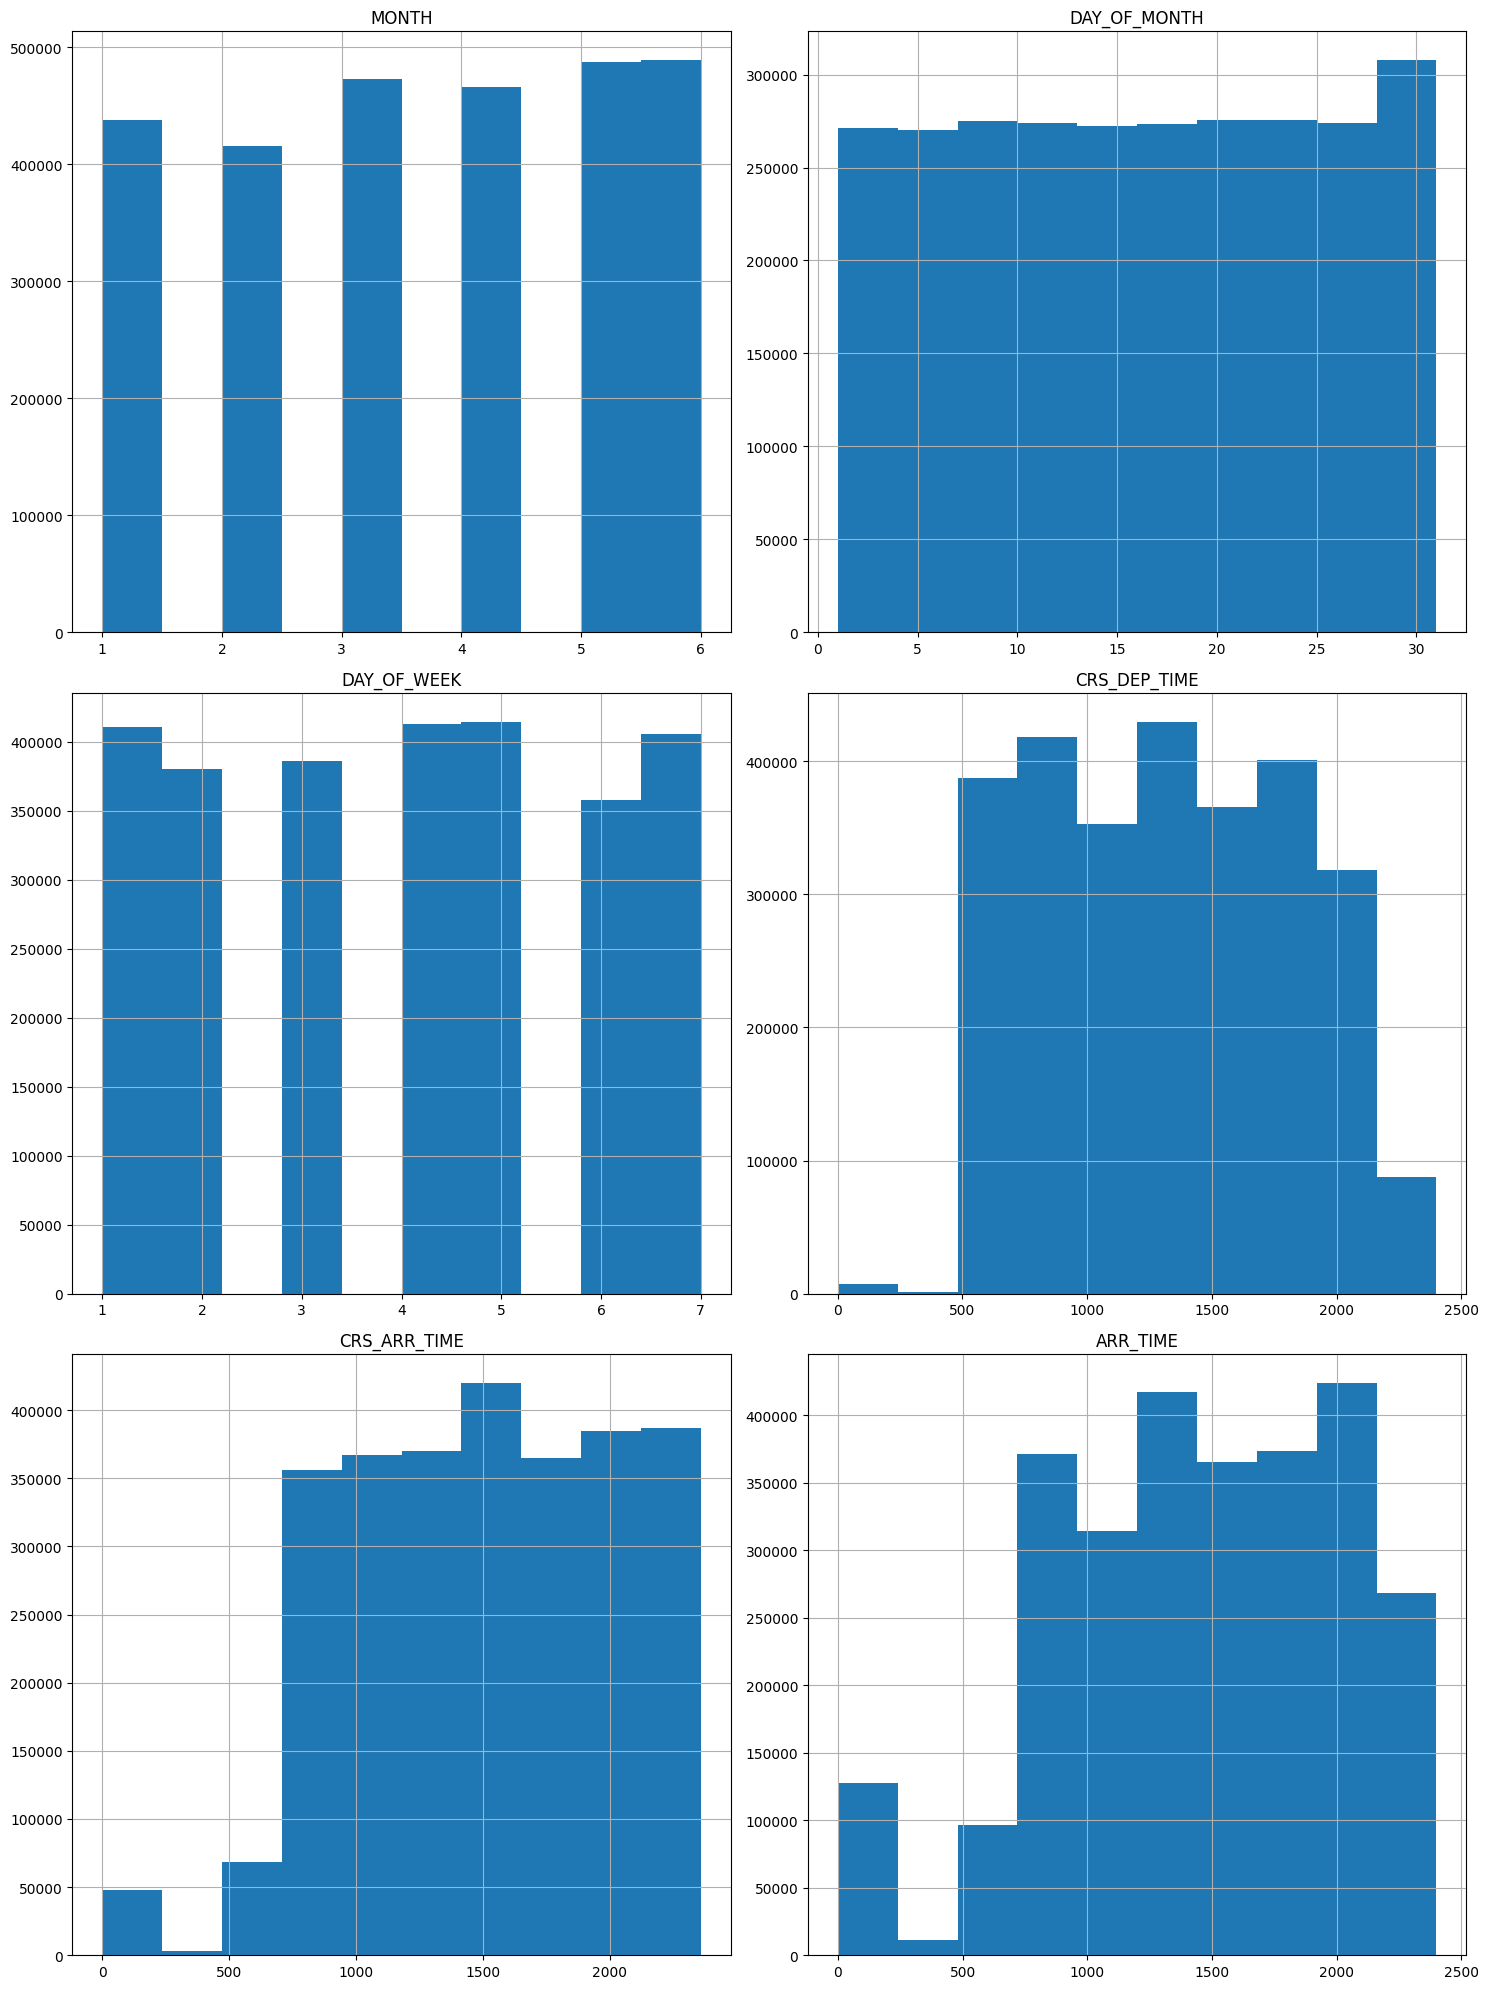

In [20]:
X_train.hist(figsize=(15,20))
plt.tight_layout();

Looking at the different distributions, none of the graphs have a Gaussian distribution, as they do not show the typical symmetrical bell shape.

We continue with a heatmap of correlations between numerical variables

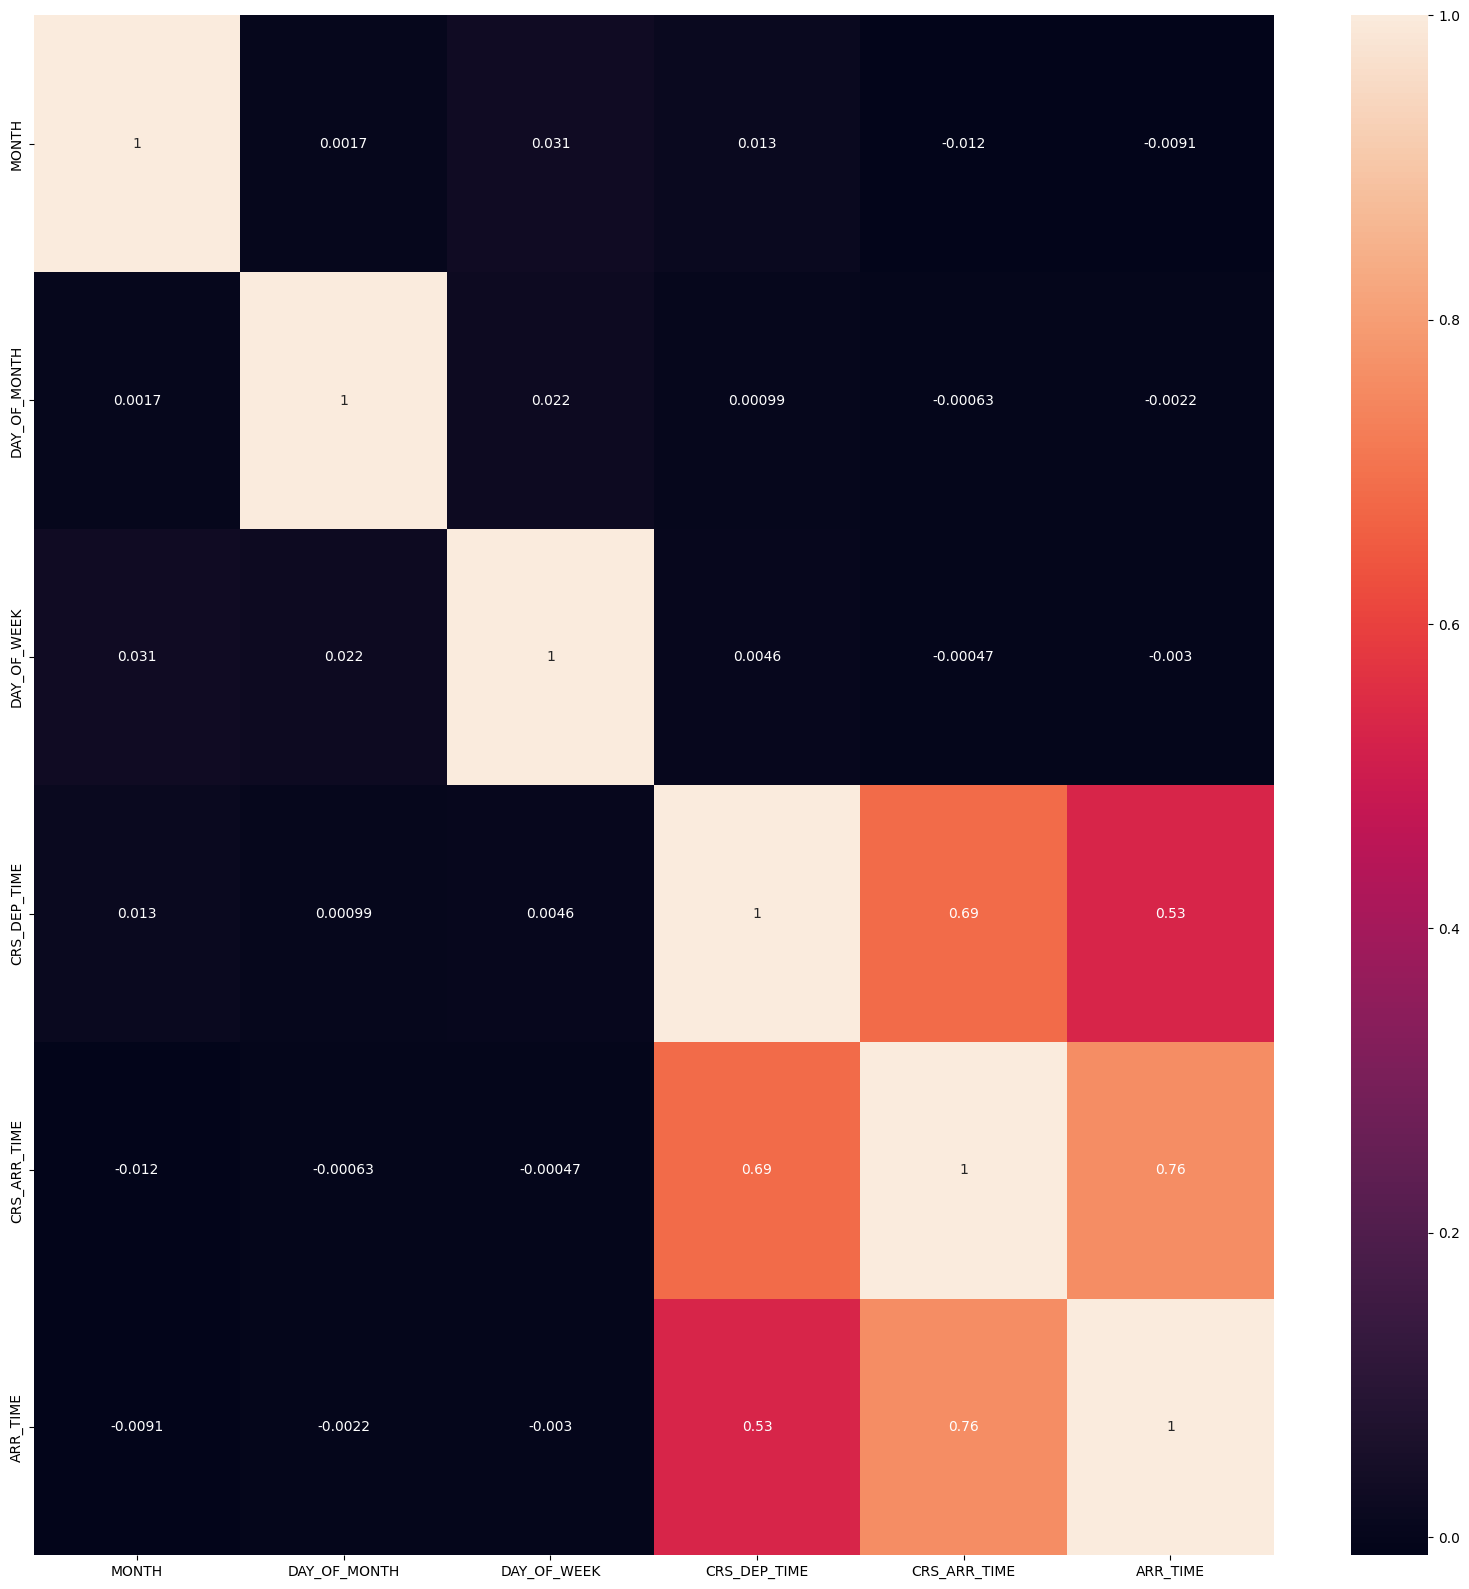

In [21]:

plt.figure(figsize= (20, 20))
sns.heatmap(df_flights.corr(numeric_only= True), annot= True);

- Strong relationship between__`CRS_ARR_TIME`__, __`ARR_TIME `__ (0.76).
- __`MONTH`__ and __`DAY_OF_WEEK`__ have weak correlations (close to 0)

As a conclusion, as our target is time patterns, we will focus on i tu CRS_DEP_TIME and CRS_ARR_TIME.




<a id="basic"></a>
# <b><span style='color:#white; font-size:40%' >Step 3.2.2.1 |</span><span style='color:#0492C2; font-size:40%' > MINI EDA |</span><span style='color:#63C5DA; font-size:35%' > Numerical Columns|</span></b></span><span style='color:#63C5DA; font-size:30%' > Treatment of Numerical Columns </span></b>

We assign a number to each city for better data management.

In [22]:
# We created a dictionary with the Cities and with an equivalent in number
ciudades_unicas = X_train['ORIGIN_CITY_NAME'].unique()
ciudades_diccionario = {ciudad: idx for idx, ciudad in enumerate(ciudades_unicas)}

print("Diccionario de ciudades:", ciudades_diccionario)
X_train['ORIGIN_CITY_NAME_NUM'] = X_train['ORIGIN_CITY_NAME'].map(ciudades_diccionario)


print(X_train[['ORIGIN_CITY_NAME', 'ORIGIN_CITY_NAME_NUM']].head())

X_train['DEST_CITY_NAME_NUM'] = X_train['DEST_CITY_NAME'].map(ciudades_diccionario)


print(X_train[['DEST_CITY_NAME', 'DEST_CITY_NAME_NUM']].head())

X_train.drop(columns=['ORIGIN_CITY_NAME','DEST_CITY_NAME'],axis=1, inplace =True)


Diccionario de ciudades: {'Los Angeles, CA': 0, 'Durango, CO': 1, 'Dallas, TX': 2, 'Atlanta, GA': 3, 'Jacksonville, FL': 4, 'Cedar Rapids/Iowa City, IA': 5, 'New York, NY': 6, 'Ontario, CA': 7, 'Phoenix, AZ': 8, 'Newark, NJ': 9, 'Pensacola, FL': 10, 'St. Louis, MO': 11, 'Columbus, OH': 12, 'San Diego, CA': 13, 'Green Bay, WI': 14, 'Denver, CO': 15, 'San Antonio, TX': 16, 'San Francisco, CA': 17, 'Miami, FL': 18, 'Charlotte, NC': 19, 'Detroit, MI': 20, 'Oakland, CA': 21, 'Fayetteville, NC': 22, 'Chicago, IL': 23, 'Tampa, FL': 24, 'Mobile, AL': 25, 'Orlando, FL': 26, 'Louisville, KY': 27, 'Greensboro/High Point, NC': 28, 'Jackson, WY': 29, 'Las Vegas, NV': 30, 'Baltimore, MD': 31, 'Providence, RI': 32, 'Seattle, WA': 33, 'Sacramento, CA': 34, 'Panama City, FL': 35, 'Washington, DC': 36, 'Fresno, CA': 37, 'Minneapolis, MN': 38, 'Pellston, MI': 39, 'Salt Lake City, UT': 40, 'Palm Springs, CA': 41, 'Madison, WI': 42, 'Sanford, FL': 43, 'Monterey, CA': 44, 'Lafayette, LA': 45, 'Augusta, GA':

In [23]:
X_test['ORIGIN_CITY_NAME_NUM'] = X_test['ORIGIN_CITY_NAME'].map(ciudades_diccionario)
print(X_test[['ORIGIN_CITY_NAME', 'ORIGIN_CITY_NAME_NUM']].head())

X_test['DEST_CITY_NAME_NUM'] = X_test['DEST_CITY_NAME'].map(ciudades_diccionario)
print(X_test[['DEST_CITY_NAME', 'DEST_CITY_NAME_NUM']].head())

X_test.drop(columns=['ORIGIN_CITY_NAME','DEST_CITY_NAME'],axis=1, inplace =True)


        ORIGIN_CITY_NAME  ORIGIN_CITY_NAME_NUM
1168046      Chicago, IL                    23
1172912     Honolulu, HI                    98
3421824   Washington, DC                    36
1492577        Tampa, FL                    24
1243764      Atlanta, GA                     3
           DEST_CITY_NAME  DEST_CITY_NAME_NUM
1168046     Milwaukee, WI                  65
1172912         Lihue, HI                 136
3421824      New York, NY                   6
1492577  Philadelphia, PA                  56
1243764      Valdosta, GA                 250


In [24]:
# List of numeric variables to transform
exclude_cols = ['DEP_DELAY', 'DEP_DELAY_NEW', 'ARR_TIME', 'CRS_ARR_TIME', 
                 'DEP_TIME', 'CRS_DEP_TIME', 'DEST_CITY_NAME', 
                 'ORIGIN_CITY_NAME', 'MONTH', 'DEP_DEL15']


num_transform = [columna for columna in X_train.columns if columna != target and columna not in exclude_cols]

print("Variables numéricas para transformar:", num_transform)

Variables numéricas para transformar: ['DAY_OF_MONTH', 'DAY_OF_WEEK', 'ORIGIN_CITY_NAME_NUM', 'DEST_CITY_NAME_NUM']


<a id="basic"></a>
# <b><span style='color:#white; font-size:40%' >Step 3.3 |</span><span style='color:#0492C2; font-size:40%' > SCALING</span></b>

Since we have numeric and categorical variables:

preprocessing: we will apply __'StandardScaler'__ to normalize the numeric variables and a __'OneHotEncoder'__ to encode the categorical variables.

In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_transform])
X_test_scaled = scaler.transform(X_test[num_transform])

In [26]:
encoder = OneHotEncoder()
X_train_encoded = encoder.fit_transform(X_train[['MONTH', 'DAY_OF_WEEK']])
X_test_encoded = encoder.fit_transform(X_train[['MONTH', 'DAY_OF_WEEK']])

In [27]:
#Categorical

cat_transform = ['MONTH', 'DAY_OF_WEEK']
for col in cat_transform:
    X_train[col] = X_train[col].apply(lambda x:np.log1p(x+1))

cat_transform = ['MONTH', 'DAY_OF_WEEK']
for col in cat_transform:
    X_test[col] = X_test[col].apply(lambda x:np.log1p(x+1))

<a id="basic"></a>
# <b><span style='color:#white; font-size:40%' >Step 3.4 |</span><span style='color:#0492C2; font-size:40%' > MODELING</span></b>

We choose to train linear models like Linear Regression, ensembles like Random Forest and boosting like XGBoost and LightGBM

- Random Forest: Tree-based ensemble method, good for noisy and non-linear data.
- XGBoost: Efficient and accurate boosting algorithm for tabular models.
- LightGBM: Faster in training, especially for large datasets.



<a id="basic"></a>
# <b><span style='color:#white; font-size:40%' >Step 3.4.1 |</span><span style='color:#0492C2; font-size:40%' > MODELING |</span><span style='color:#63C5DA; font-size:35%' > Random Forest Regressor</span></b>

In [28]:
#We create an empty dictionary called optimized_metrics to store the best metrics obtained by training the model with different algorithms.
metricas_optimizadas = {}

In [29]:
rf_reg = RandomForestRegressor(n_estimators=20 ,max_depth=3,min_samples_leaf=5,min_samples_split=2)
rf_reg.fit(X_train,y_train)



RandomForestRegressor(max_depth=3, min_samples_leaf=5, n_estimators=20)

In [30]:
#SAVE pickle model
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(rf_reg, f)

#OPEN pickle model
with open('random_forest_model.pkl', 'rb') as f:
    randomforestcargado = pickle.load(f)

y_pred = randomforestcargado.predict(X_test)
y_pred = rf_reg.predict(X_test)


In [31]:

mse_rf = mean_squared_error(y_test, y_pred)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred)
r2_rf = rf_reg.score(X_test, y_test)

print(f"Error cuadrático medio (MSE): {mse_rf}")
print(f"Raíz del error cuadrático medio (RMSE): {rmse_rf}")
print(f"Error absoluto medio (MAE): {mae_rf}")
print(f"Coeficiente de determinación (R²): {r2_rf}")

Error cuadrático medio (MSE): 7504.077792370948
Raíz del error cuadrático medio (RMSE): 86.62608032440893
Error absoluto medio (MAE): 72.73053556621163
Coeficiente de determinación (R²): 0.9770615954847801


- RMSE= The model predictions differs from the actual values ​​by 86.5 minutes
- MAE= The model predictions have an error of approximately 72.67 minutes
- R² = The model explains 97.7% of the variability of the actual data.

Conclusion
- The high R² value (0.977) means that the predictions explain almost all the variability in the data.

In [32]:
rf_regressor = RandomForestRegressor(random_state=42)

param_dist_rf = {
    'n_estimators': [5,10,15],
    'max_depth': [3, 6, 10, 15, None],  
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

rf_random = RandomizedSearchCV(rf_regressor,
                               param_distributions=param_dist_rf,
                               n_iter=10,  
                               cv=3,  
                               scoring='neg_mean_squared_error', 
                               random_state=42)


rf_random.fit(X_train, y_train)
print('Random Forest best_score: ', rf_random.best_score_)
print('Random Forest best_params: ', rf_random.best_params_)
metricas_optimizadas['Random Forest'] = rf_random.best_score_

Random Forest best_score:  -11.791403905281276
Random Forest best_params:  {'n_estimators': 10, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': None, 'bootstrap': False}


<a id="basic"></a>
# <b><span style='color:#white; font-size:40%' >Step 3.4.2 |</span><span style='color:#0492C2; font-size:40%' > MODELING |</span><span style='color:#63C5DA; font-size:35%' > XGBR Regressor</span></b>

In [33]:
xgb_reg = XGBRegressor()
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [34]:
y_pred = xgb_reg.predict(X_test)

In [35]:
mse_xgb = mean_squared_error(y_test, y_pred)
rmse_xgb = np.sqrt(mse_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred)
r2_xgb = xgb_reg.score(X_test, y_test)

print(f"Error cuadrático medio (MSE): {mse_xgb}")
print(f"Raíz del error cuadrático medio (RMSE): {rmse_xgb}")
print(f"Error absoluto medio (MAE): {mae_xgb}")
print(f"Coeficiente de determinación (R²): {r2_xgb}")

Error cuadrático medio (MSE): 43.672016627712914
Raíz del error cuadrático medio (RMSE): 6.608480659555032
Error absoluto medio (MAE): 2.5171628786845135
Coeficiente de determinación (R²): 0.9998665037315551


- MSE= 43.67 is low, meaning that the model predictions are close to the actual values.
- RMSE= the predictions have an error of approximately 6.6 minutes from the actual value.
- MAE= the predictions are, on average, 2.51 minutes from the actual value.
- R² =0.99 , is almost equal to 1, meaning that the model explains almost all the variability in the data.

Conclusion:
- R² almost equal to 1
- MAE and RMSE reasonably low, resulting in good model performance

In [36]:
xgbr = XGBRegressor(random_state=42)

param_dist_xgbr = {
    'max_depth': [3, 6, 10, 15],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 150, 200],
    'subsample': np.arange(0.5, 1.0, 0.1),
    'colsample_bytree': np.arange(0.5, 1.0, 0.1),
    'colsample_bylevel': np.arange(0.5, 1.0, 0.1),
    'gamma': [0, 0.1, 0.5, 1]
}


xgbr_random = RandomizedSearchCV(xgbr,
                                 param_distributions=param_dist_xgbr,
                                 n_iter=10,  
                                 cv=3,  
                                 scoring='neg_mean_squared_error',  
                                 random_state=42)


xgbr_random.fit(X_train, y_train)
print('XGBRegressor best_score: ', xgbr_random.best_score_)
print('XGBRegressor best_params: ', xgbr_random.best_params_)
metricas_optimizadas['XGBRegressor'] = xgbr_random.best_score_

XGBRegressor best_score:  -43.49891568614513
XGBRegressor best_params:  {'subsample': 0.8999999999999999, 'n_estimators': 150, 'max_depth': 10, 'learning_rate': 0.2, 'gamma': 0.1, 'colsample_bytree': 0.7999999999999999, 'colsample_bylevel': 0.7999999999999999}


In [37]:
#To confirm that the model is not overfitted, we will perform cross-validation.
model = XGBRegressor()
kfold = KFold(n_splits=5, shuffle=True, random_state=42) 

mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
mse_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring=mse_scorer)
mean_mse = -np.mean(mse_scores)  
rmse = np.sqrt(mean_mse)

print(f"Promedio del MSE: {mean_mse}")
print(f"Promedio del RMSE: {rmse}")

Promedio del MSE: 44.4505187852745
Promedio del RMSE: 6.667122226663802


- MSE= 44.45 is similar to before (43.67), meaning the model is consistent and not overfitted to the training set.
- RMSE= 6.6 is the same as before, this confirms the model is fine

Conclusion:
- There is no evidence of significant overfitting or underfitting.

<a id="basic"></a>
# <b><span style='color:#white; font-size:40%' >Step 3.4.3 |</span><span style='color:#0492C2; font-size:40%' > MODELING |</span><span style='color:#63C5DA; font-size:35%' > LightGBM Regressor</span></b>

In [38]:
lgmb_reg = LGBMRegressor()
lgmb_reg.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020935 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1309
[LightGBM] [Info] Number of data points in the train set: 2769055, number of used features: 8
[LightGBM] [Info] Start training from score 1443.655577


LGBMRegressor()

In [39]:
y_pred = lgmb_reg.predict(X_test)

In [40]:
mse_lgmb = mean_squared_error(y_test, y_pred)
rmse_lgmb = np.sqrt(mse_lgmb)
mae_lgmb = mean_absolute_error(y_test, y_pred)
r2_lgmb = lgmb_reg.score(X_test, y_test)

print(f"Error cuadrático medio (MSE): {mse_lgmb}")
print(f"Raíz del error cuadrático medio (RMSE): {rmse_lgmb}")
print(f"Error absoluto medio (MAE): {mae_lgmb}")
print(f"Coeficiente de determinación (R²): {r2_lgmb}")

Error cuadrático medio (MSE): 38.09254463006968
Raíz del error cuadrático medio (RMSE): 6.171915799010035
Error absoluto medio (MAE): 2.3523538165417306
Coeficiente de determinación (R²): 0.9998835590165887


- MSE= 38.09 is low,  lo que sugiere que las predicciones del modelo están bastante cerca de los valores reales.
- RMSE= the predictions have an error of approximately 6.17 minutes from the actual value.
- MAE= the predictions are, on average, 2.35 units from the actual value.
- R² =0.99 , is almost equal to 1, meaning that the model explains almost all the variability in the data.

Conclusion:
- The predictions are very close to the actual values, with a small error on average (RMSE = 6.17).
- The model is able to explain almost all the variability of the data (R² = 0.99988).
- The MAE and MSE are also low, reinforcing that the model has a good fit.

In [41]:
lgbm_reg = LGBMRegressor(random_state=42)

param_dist_lgbm = {
    'max_depth': [3, 6, 10, 15],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 150, 200],
    'num_leaves': [31, 50, 100, 200],
    'subsample': np.arange(0.5, 1.0, 0.1),
    'colsample_bytree': np.arange(0.5, 1.0, 0.1),
}


lgbm_random = RandomizedSearchCV(lgbm_reg,
                                 param_distributions=param_dist_lgbm,
                                 n_iter=10,  
                                 cv=3,  
                                 scoring='neg_mean_squared_error',  
                                 random_state=42)


lgbm_random.fit(X_train, y_train)
print('LGBMRegressor best_score: ', lgbm_random.best_score_)
print('LGBMRegressor best_params: ', lgbm_random.best_params_)
metricas_optimizadas['LGBMRegressor'] = lgbm_random.best_score_

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005901 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1305
[LightGBM] [Info] Number of data points in the train set: 1846036, number of used features: 8
[LightGBM] [Info] Start training from score 1443.146144
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005212 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1304
[LightGBM] [Info] Number of data points in the train set: 1846037, number of used features: 8
[LightGBM] [Info] Start training from score 1443.835300
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005018 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is n

In [42]:
#To confirm that the model is not overfitted, we will perform cross-validation.
model = LGBMRegressor()
kfold = KFold(n_splits=5, shuffle=True, random_state=42) 

mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
mse_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring=mse_scorer)
mean_mse = -np.mean(mse_scores)  
rmse = np.sqrt(mean_mse)

print(f"Promedio del MSE: {mean_mse}")
print(f"Promedio del RMSE: {rmse}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008620 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1305
[LightGBM] [Info] Number of data points in the train set: 2215244, number of used features: 8
[LightGBM] [Info] Start training from score 1443.652307
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009287 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1308
[LightGBM] [Info] Number of data points in the train set: 2215244, number of used features: 8
[LightGBM] [Info] Start training from score 1443.591187
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008477 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is n

- MSE= 41.26 is similar to before (38.09), meaning the model is consistent and not overfitted to the training set.
- RMSE= 6.42 is similar to before (6,17) this confirms the model is fine

Conclusion:
- There is no evidence of significant overfitting or underfitting.

<a id="basic"></a>
# <b><span style='color:#white; font-size:40%' >Step 3.4.4 |</span><span style='color:#0492C2; font-size:40%' > MODELING |</span><span style='color:#63C5DA; font-size:35%' > Best Model</span></b>

We will compare the results before optimization of the hyperparameters for the 3 models.  (default parameters)

         Modelo          MSE       RMSE        MAE        R2
0  RandomForest  7504.077792  86.626080  72.730536  0.977062
1       XGBoost    43.672017   6.608481   2.517163  0.999867
2      LightGBM    38.092545   6.171916   2.352354  0.999884


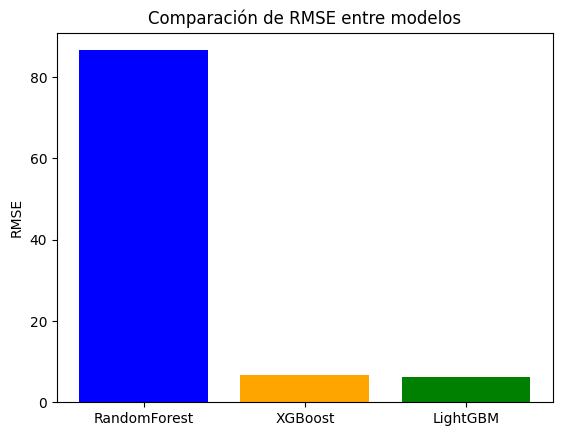

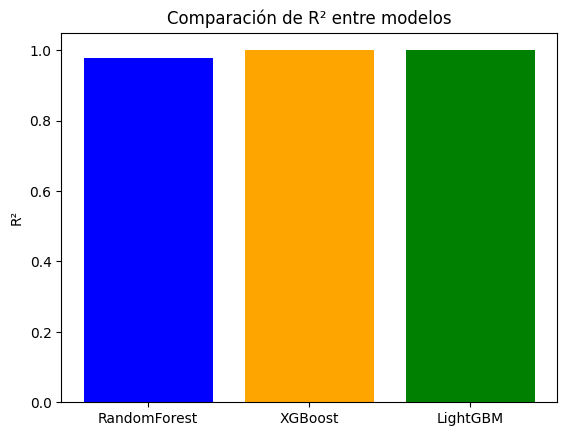

In [43]:
metricas_modelos = {
    'Modelo': ['RandomForest', 'XGBoost', 'LightGBM'],
    'MSE': [mse_rf, mse_xgb, mse_lgmb],
    'RMSE': [rmse_rf, rmse_xgb, rmse_lgmb],
    'MAE': [mae_rf, mae_xgb, mae_lgmb],
    'R2': [r2_rf, r2_xgb, r2_lgmb]
}

resultados_df = pd.DataFrame(metricas_modelos)
print(resultados_df)

# Graph Compare RMSE 
plt.bar(['RandomForest', 'XGBoost', 'LightGBM'], [rmse_rf, rmse_xgb, rmse_lgmb], color=['blue', 'orange', 'green'])
plt.title('Comparación de RMSE entre modelos')
plt.ylabel('RMSE')
plt.show()

# Graph Compare R2 
plt.bar(['RandomForest', 'XGBoost', 'LightGBM'], [r2_rf, r2_xgb, r2_lgmb], color=['blue', 'orange', 'green'])
plt.title('Comparación de R² entre modelos')
plt.ylabel('R²')
plt.show()

- Random Forest is not competitive. It shows a much higher MSE than the other models, indicating that Random Forest has a worse fitting ability. It also has the smallest R²
-XGBoost has metrics that indicate an excellent fit
- LightGBM has slightly better metrics than XGBoost, making it the best model for this case.

Conclusion
- __LightGBM__ is the best model, followed closely by XGBoost, while Random Forest lags behind in comparison.

We will evaluate the models with the best parameters found through hyperparameter optimization (RandomizedSearchCV),

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012360 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1306
[LightGBM] [Info] Number of data points in the train set: 2769055, number of used features: 8
[LightGBM] [Info] Start training from score 1443.655577
                     MSE      RMSE       MAE        R²
Random Forest  11.564104  3.400604  0.920910  0.999965
XGBoost        44.144784  6.644154  2.576339  0.999865
LightGBM       47.500374  6.892052  3.227077  0.999855


<Axes: title={'center': 'Comparación de Modelos Optimizados'}, xlabel='Modelo'>

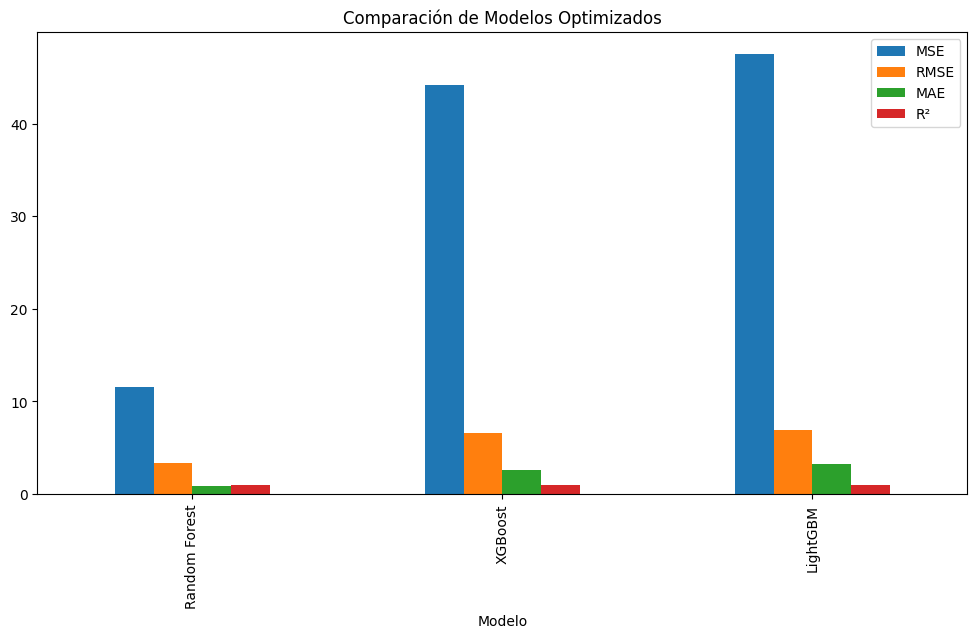

In [44]:
metricas_finales = {}

# Random Forest best params
rf_best = RandomForestRegressor(**rf_random.best_params_, random_state=42)
rf_best.fit(X_train, y_train)
rf_y_pred = rf_best.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_rmse = np.sqrt(rf_mse)
rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)
metricas_finales['Random Forest'] = {'MSE': rf_mse, 'RMSE': rf_rmse, 'MAE': rf_mae, 'R²': rf_r2}

# XGBoost best params
xgb_best = XGBRegressor(**xgbr_random.best_params_, random_state=42)
xgb_best.fit(X_train, y_train)
xgb_y_pred = xgb_best.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_y_pred)
xgb_rmse = np.sqrt(xgb_mse)
xgb_mae = mean_absolute_error(y_test, xgb_y_pred)
xgb_r2 = r2_score(y_test, xgb_y_pred)
metricas_finales['XGBoost'] = {'MSE': xgb_mse, 'RMSE': xgb_rmse, 'MAE': xgb_mae, 'R²': xgb_r2}

# LightGBM best params
lgbm_best = LGBMRegressor(**lgbm_random.best_params_, random_state=42)
lgbm_best.fit(X_train, y_train)
lgbm_y_pred = lgbm_best.predict(X_test)
lgbm_mse = mean_squared_error(y_test, lgbm_y_pred)
lgbm_rmse = np.sqrt(lgbm_mse)
lgbm_mae = mean_absolute_error(y_test, lgbm_y_pred)
lgbm_r2 = r2_score(y_test, lgbm_y_pred)
metricas_finales['LightGBM'] = {'MSE': lgbm_mse, 'RMSE': lgbm_rmse, 'MAE': lgbm_mae, 'R²': lgbm_r2}

print(pd.DataFrame(metricas_finales).T)

#Graphs
metricas_df = pd.DataFrame(metricas_finales).T.reset_index().rename(columns={'index': 'Modelo'})
metricas_df.plot(x='Modelo', kind='bar', figsize=(12, 6), title="Comparación de Modelos Optimizados")


- Random Forest achieves significantly better performance on all metrics after optimization compared to the default values ​​shown in the first code. Is the bhe best model among the three, with the best MSE, RMSE, MAE, and a near-perfect R².
- XGBoost is still a solid choice, but it does not outperform Random Forest on any of the metrics.
- LightGBM, while efficient, has shown somewhat inferior performance compared to XGBoost and Random Forest after optimization.

Conclusion
- Random Forest is the best model for this dataset, as it has the best performance on all key metrics after optimization.
- XGBoost is a second competitive option, but if you are looking for the most accurate model, Random Forest is the optimal choice.
- LightGBM, despite its good ability to handle large volumes of data, does not offer the best fit in this case.

We are going to make a graphical comparison between the results before and after optimization to visualize how hyperparameter adjustments improve the performance of the models.

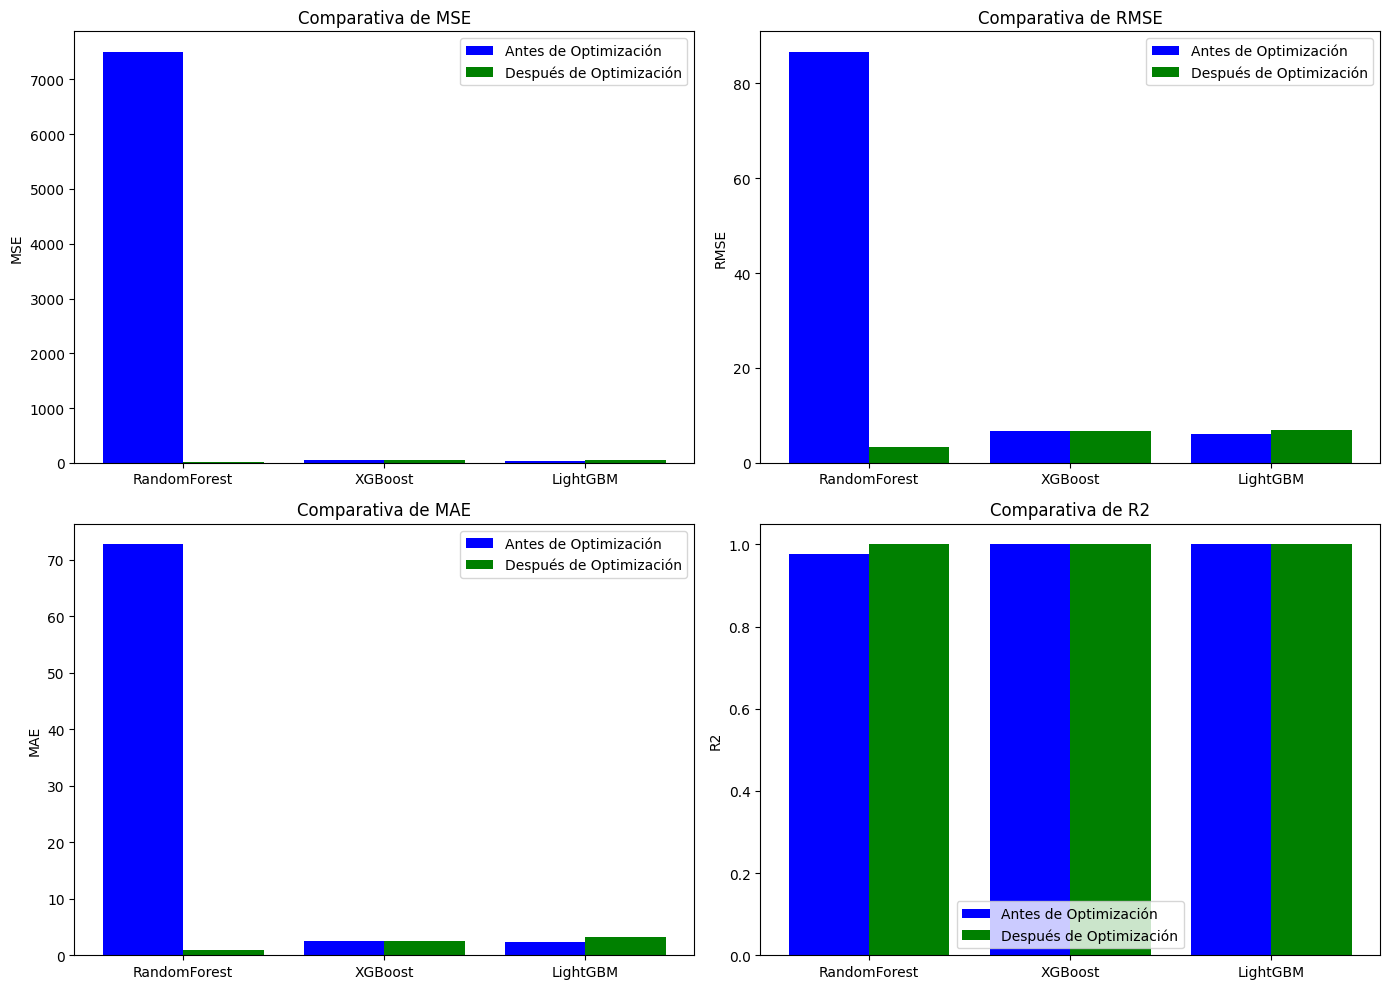

In [45]:
metricas_antes = {
    'Modelo': ['RandomForest', 'XGBoost', 'LightGBM'],
    'MSE': [mse_rf, mse_xgb, mse_lgmb],
    'RMSE': [rmse_rf, rmse_xgb, rmse_lgmb],
    'MAE': [mae_rf, mae_xgb, mae_lgmb],
    'R2': [r2_rf, r2_xgb, r2_lgmb]
}

metricas_despues = {
    'Modelo': ['RandomForest', 'XGBoost', 'LightGBM'],
    'MSE': [rf_mse, xgb_mse, lgbm_mse],
    'RMSE': [rf_rmse, xgb_rmse, lgbm_rmse],
    'MAE': [rf_mae, xgb_mae, lgbm_mae],
    'R2': [rf_r2, xgb_r2, lgbm_r2]
}

df_antes = pd.DataFrame(metricas_antes)
df_despues = pd.DataFrame(metricas_despues)

metricas = ['MSE', 'RMSE', 'MAE', 'R2']
x = np.arange(len(df_antes))  

# Graph
fig, axes = plt.subplots(2, 2, figsize=(14, 10))  
axes = axes.ravel()  

for i, metrica in enumerate(metricas):
    axes[i].bar(x - 0.2, df_antes[metrica], 0.4, label='Antes de Optimización', color='blue')
    axes[i].bar(x + 0.2, df_despues[metrica], 0.4, label='Después de Optimización', color='green')
    axes[i].set_title(f'Comparativa de {metrica}')
    axes[i].set_xticks(x)
    axes[i].set_xticklabels(df_antes['Modelo'])
    axes[i].set_ylabel(metrica)
    axes[i].legend()

plt.tight_layout()
plt.show()

<a id="basic"></a>
# <b><span style='color:#white; font-size:40%' >Step 3.5 |</span><span style='color:#0492C2; font-size:40%' > GRAPHS</span></b>

<a id="basic"></a>
# <b><span style='color:#white; font-size:40%' >Step 3.5.1 |</span><span style='color:#0492C2; font-size:40%' > GRAPHS |</span><span style='color:#63C5DA; font-size:35%' > Real vs Predicction</span></b>

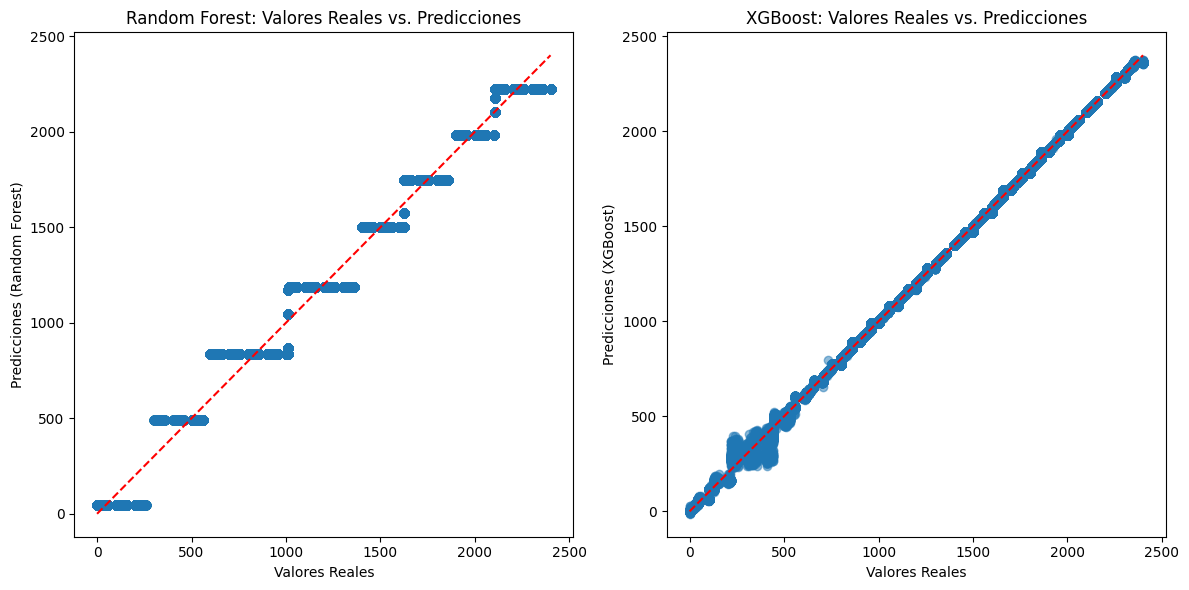

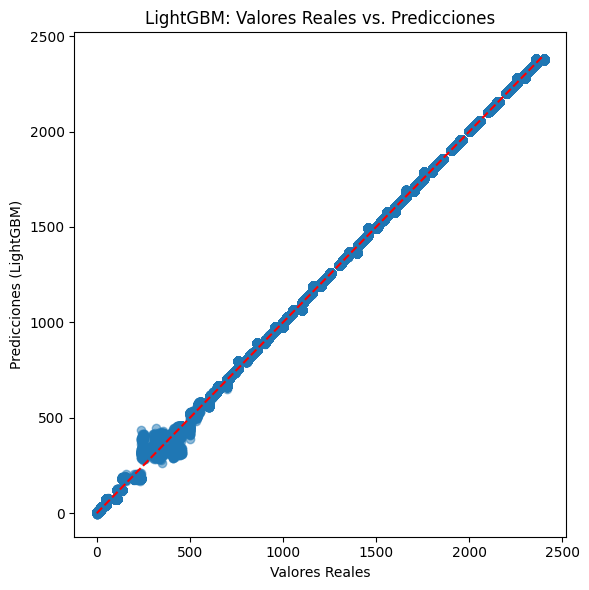

In [46]:
y_pred_rf = rf_reg.predict(X_test)  # Random Forest
y_pred_xgb = xgb_reg.predict(X_test)  # XGBoost
y_pred_lgb = lgmb_reg.predict(X_test) #LightGBM

# Graph Random Forest
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones (Random Forest)")
plt.title("Random Forest: Valores Reales vs. Predicciones")

# Graph XGBoost
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_xgb, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones (XGBoost)")
plt.title("XGBoost: Valores Reales vs. Predicciones")

plt.tight_layout()
plt.show()

# Graph LightGBM
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_lgb, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones (LightGBM)")
plt.title("LightGBM: Valores Reales vs. Predicciones")

plt.tight_layout()
plt.show()

- Random Forest shows a higher spread in its predictions compared to XGBoost and LightGBM, indicating that it might be having more difficulty predicting certain values.
- XGBoost and LightGBM perform much better, with LightGBM showing a slight advantage in terms of prediction accuracy.
- XGBoost and LightGBM are more robust and consistent models, with LightGBM slightly better in this case.

Conclusion
- LightGBM appears to be the best model among the three, with XGBoost also being very effective. Random Forest has reasonable accuracy, but is not as strong as the other two models.- 

<a id="basic"></a>
# <b><span style='color:#white; font-size:40%' >Step 3.5.2 |</span><span style='color:#0492C2; font-size:40%' > GRAPHS |</span><span style='color:#63C5DA; font-size:35%' > Distribution of Residuals</span></b>

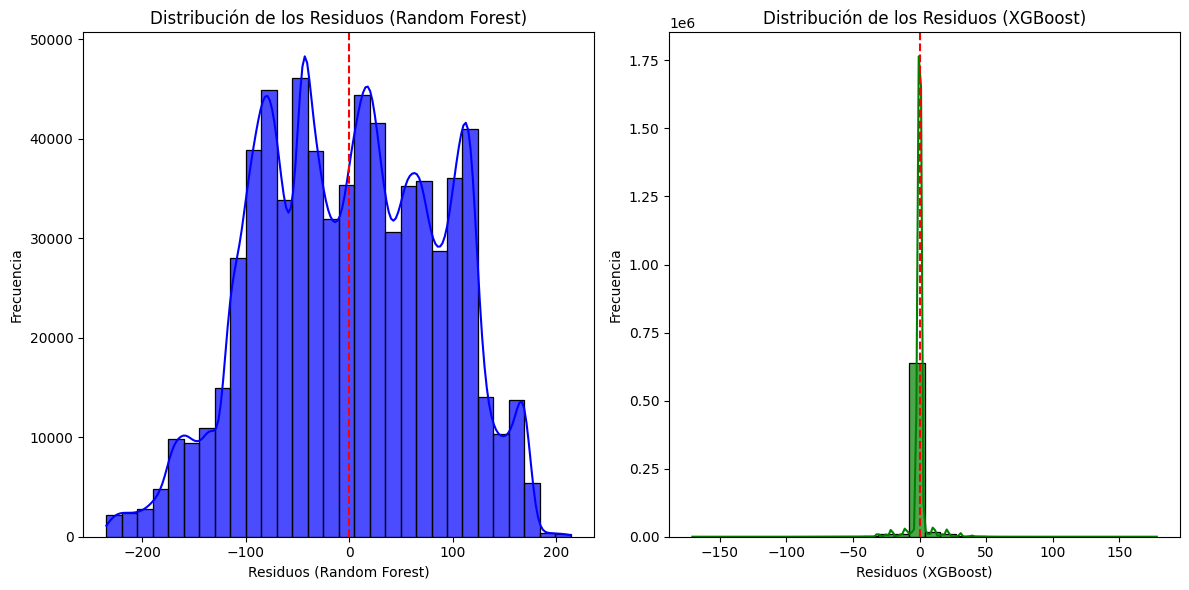

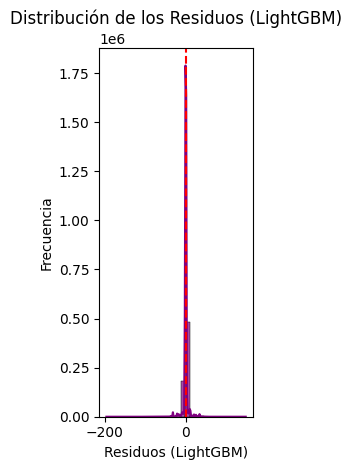

In [47]:
residuos_rf = y_test - y_pred_rf # Random Forest
residuos_xgb = y_test - y_pred_xgb # XGBoost
residuos_lgbm = y_test - y_pred_lgb #LightGBM

# Graph  Random Forest
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(residuos_rf, kde=True, bins=30, color='blue', alpha=0.7)
plt.axvline(x=0, color='red', linestyle='--')
plt.xlabel("Residuos (Random Forest)")
plt.ylabel("Frecuencia")
plt.title("Distribución de los Residuos (Random Forest)")

# Graph  XGBoost
plt.subplot(1, 2, 2)
sns.histplot(residuos_xgb, kde=True, bins=30, color='green', alpha=0.7)
plt.axvline(x=0, color='red', linestyle='--')
plt.xlabel("Residuos (XGBoost)")
plt.ylabel("Frecuencia")
plt.title("Distribución de los Residuos (XGBoost)")

plt.tight_layout()
plt.show()

# Graph LightGBM
plt.subplot(1, 3, 3)
sns.histplot(residuos_lgbm, kde=True, bins=30, color='purple', alpha=0.7)
plt.axvline(x=0, color='red', linestyle='--')
plt.xlabel("Residuos (LightGBM)")
plt.ylabel("Frecuencia")
plt.title("Distribución de los Residuos (LightGBM)")

plt.tight_layout()
plt.show()

- Random Forest has a higher spread in the residuals, which might indicate that it is not predicting as accurately as XGBoost or LightGBM.
- XGBoost has a narrower distribution of residuals, indicating that the predictions are more accurate and the model fit better than Random Forest.
- LightGBM has the most concentrated distribution of residuals around 0, reflecting the best performance of this model, with very few errors and outstanding accuracy.

Conclusion
- LightGBM shows the best fit in terms of the distribution of residuals, followed by XGBoost, while Random Forest has more variability in residuals and might not be as accurate.

<a id="read"></a>
# <p style="background-color:#0A1172; font-family:calibri; color:white; font-size:80%; text-align:center; border-radius:15px 50px;">Step 4 | DATA ANALYSIS</p>
⬆️ [Tabel of Contents](#contents_tabel)

<a id="basic"></a>
# <b><span style='color:#white; font-size:40%' >Step 4.1 |</span><span style='color:#0492C2; font-size:40%' > Data Analysis |</span></b></span><span style='color:#63C5DA; font-size:35%' >  

In [55]:
df_flights["duracionvuelo"]= df_flights["CRS_ARR_TIME"] - df_flights["CRS_DEP_TIME"]
df_flights["retrasoabsoluto"]= df_flights["ARR_TIME"] - df_flights["CRS_ARR_TIME"]
df_flights["retrasorelativo"]= df_flights["retrasoabsoluto"] / df_flights["duracionvuelo"]

print(df_flights)




         MONTH  DAY_OF_MONTH  DAY_OF_WEEK                ORIGIN_CITY_NAME  \
0            1             1            1                      Albany, NY   
1            1             1            1                  Alexandria, LA   
2            1             1            1                  Alexandria, LA   
3            1             1            1  Allentown/Bethlehem/Easton, PA   
4            1             1            1  Allentown/Bethlehem/Easton, PA   
...        ...           ...          ...                             ...   
3461314      6            30            7                  Washington, DC   
3461315      6            30            7                  Wilmington, NC   
3461316      6            30            7                  Wilmington, NC   
3461317      6            30            7                  Wilmington, NC   
3461318      6            30            7                   Worcester, MA   

         DEST_CITY_NAME  CRS_DEP_TIME  CRS_ARR_TIME  ARR_TIME  duracionvuel

In [ ]:

#Day of the week with the most delays (absolute or relative delay)
dia_con_mas_retrasos = df_flights.groupby('DAY_OF_WEEK')['retrasoabsoluto'].sum().idxmax()
mes_con_mas_retrasos = df_flights.groupby('MONTH')['retrasoabsoluto'].sum().idxmax()

print("\nDía de la Semana con Más Retrasos:", dia_con_mas_retrasos)
print("\nMes con Más Retrasos:", mes_con_mas_retrasos)



Día de la Semana con Más Retrasos: 6

Mes con Más Retrasos: 2


ORIGIN_CITY_NAME
Burbank, CA             -inf
North Platte, NE   -3.037856
Dodge City, KS     -3.034126
Jamestown, ND      -2.031753
Grand Island, NE   -1.770267
Name: retrasorelativo, dtype: float64
DEST_CITY_NAME
Houston, TX            -inf
Dothan, AL             -inf
Walla Walla, WA   -3.931796
Texarkana, AR     -3.586368
Waco, TX          -2.643879
Name: retrasorelativo, dtype: float64


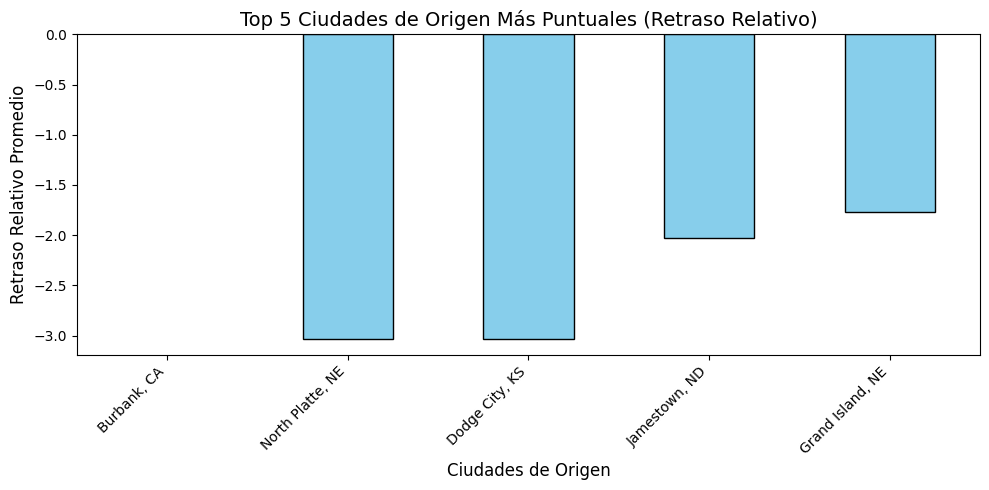

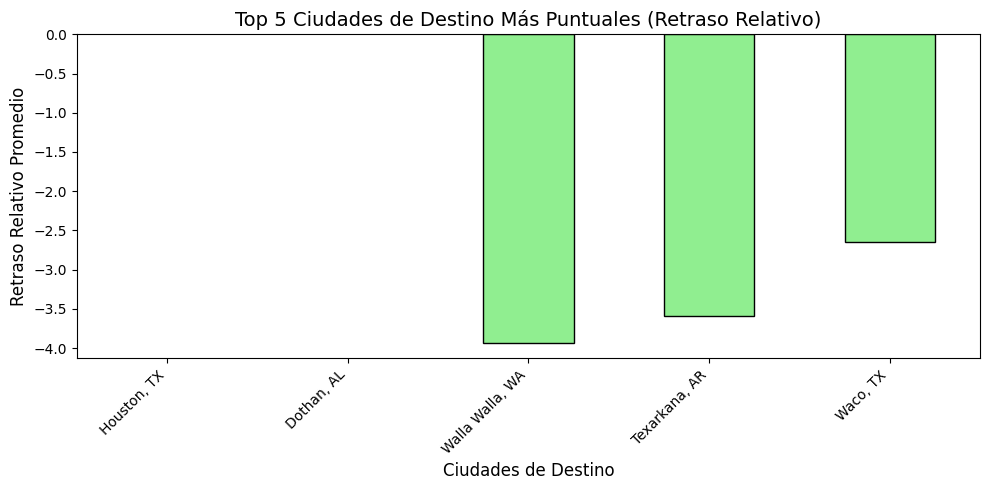

In [56]:
# 5 Most punctual origin/destination cities for flights (lowest relative delay)
ciudades_origen_puntuales = df_flights.groupby('ORIGIN_CITY_NAME')['retrasorelativo'].mean().sort_values().head(5)
ciudades_destino_puntuales = df_flights.groupby('DEST_CITY_NAME')['retrasorelativo'].mean().sort_values().head(5)
print(ciudades_origen_puntuales)
print(ciudades_destino_puntuales)

plt.figure(figsize=(10, 5))
ciudades_origen_puntuales.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Top 5 Ciudades de Origen Más Puntuales (Retraso Relativo)", fontsize=14)
plt.ylabel("Retraso Relativo Promedio", fontsize=12)
plt.xlabel("Ciudades de Origen", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Ciudades de destino más puntuales
plt.figure(figsize=(10, 5))
ciudades_destino_puntuales.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title("Top 5 Ciudades de Destino Más Puntuales (Retraso Relativo)", fontsize=14)
plt.ylabel("Retraso Relativo Promedio", fontsize=12)
plt.xlabel("Ciudades de Destino", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

ORIGIN_CITY_NAME  DEST_CITY_NAME
Phoenix, AZ       Durango, CO       273138.0
Name: retrasoabsoluto, dtype: float64
ORIGIN_CITY_NAME  DEST_CITY_NAME
Chicago, IL       New York, NY     -622941.0
Name: retrasoabsoluto, dtype: float64


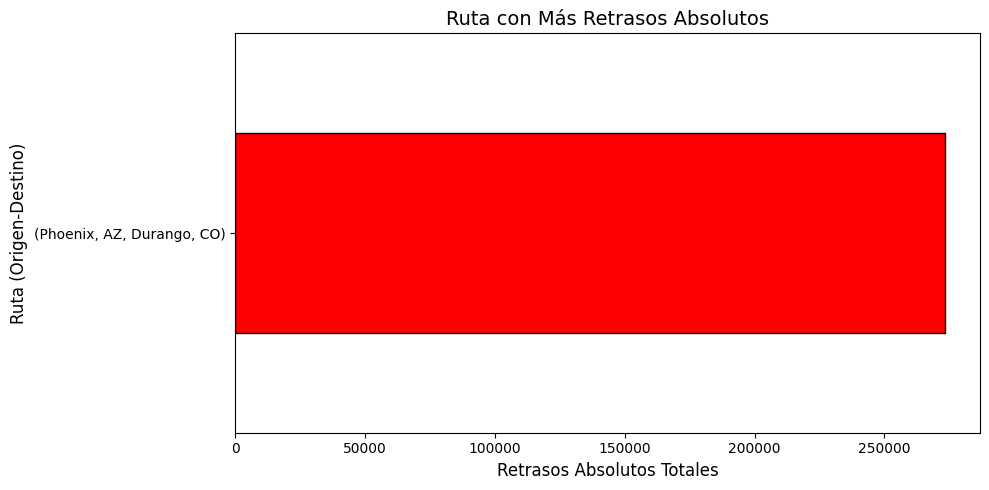

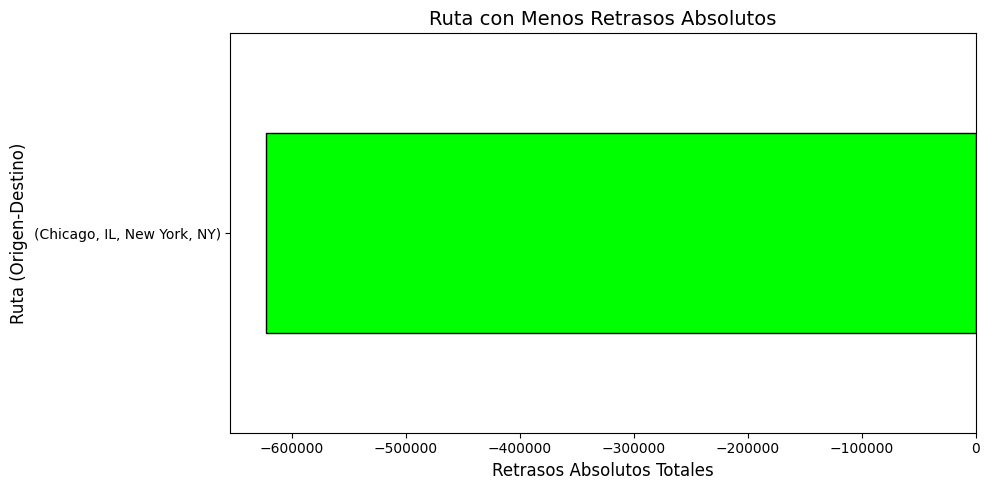

In [59]:

#Origin-destination route with the longest delay
trayecto_origen_destino_mas_retraso = df_flights.groupby(['ORIGIN_CITY_NAME', 'DEST_CITY_NAME'])['retrasoabsoluto'].sum().sort_values(ascending=False).head(1)
trayecto_origen_destino_menos_retraso = df_flights.groupby(['ORIGIN_CITY_NAME', 'DEST_CITY_NAME'])['retrasoabsoluto'].sum().sort_values(ascending=True).head(1)
print(trayecto_origen_destino_mas_retraso)
print(trayecto_origen_destino_menos_retraso)

plt.figure(figsize=(10, 5))
trayecto_origen_destino_mas_retraso.plot(kind='barh', color='red', edgecolor='black')
plt.title("Ruta con Más Retrasos Absolutos", fontsize=14)
plt.xlabel("Retrasos Absolutos Totales", fontsize=12)
plt.ylabel("Ruta (Origen-Destino)", fontsize=12)
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 5))
trayecto_origen_destino_menos_retraso.plot(kind='barh', color='lime', edgecolor='black')
plt.title("Ruta con Menos Retrasos Absolutos", fontsize=14)
plt.xlabel("Retrasos Absolutos Totales", fontsize=12)
plt.ylabel("Ruta (Origen-Destino)", fontsize=12)
plt.tight_layout()
plt.show()


ORIGIN_CITY_NAME
Brunswick, GA            10018.0
Santa Rosa, CA            4861.0
Helena, MT                4457.0
Charleston/Dunbar, WV     3439.0
Albany, GA                3158.0
Name: retrasoabsoluto, dtype: float64
DEST_CITY_NAME
Durango, CO           236287.0
Fairbanks, AK          75783.0
Grand Junction, CO     55550.0
St. George, UT         42713.0
Santa Rosa, CA          5298.0
Name: retrasoabsoluto, dtype: float64


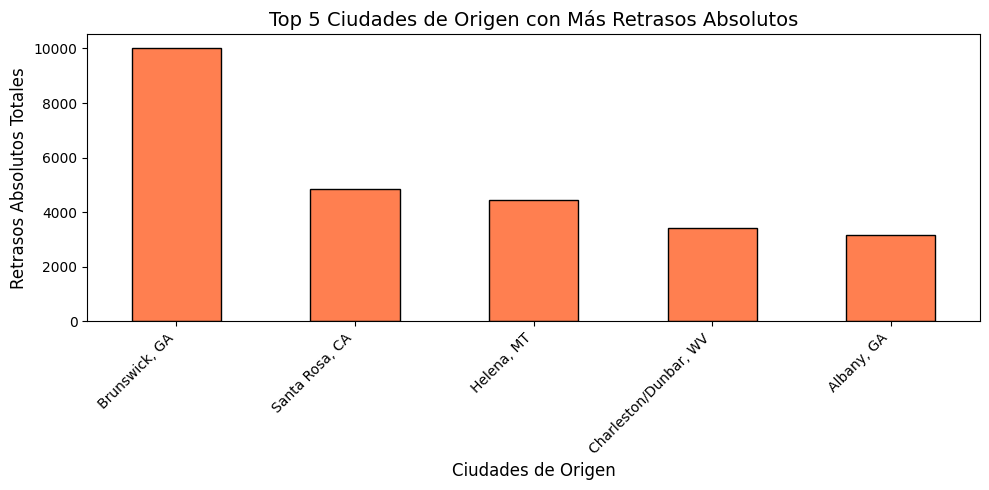

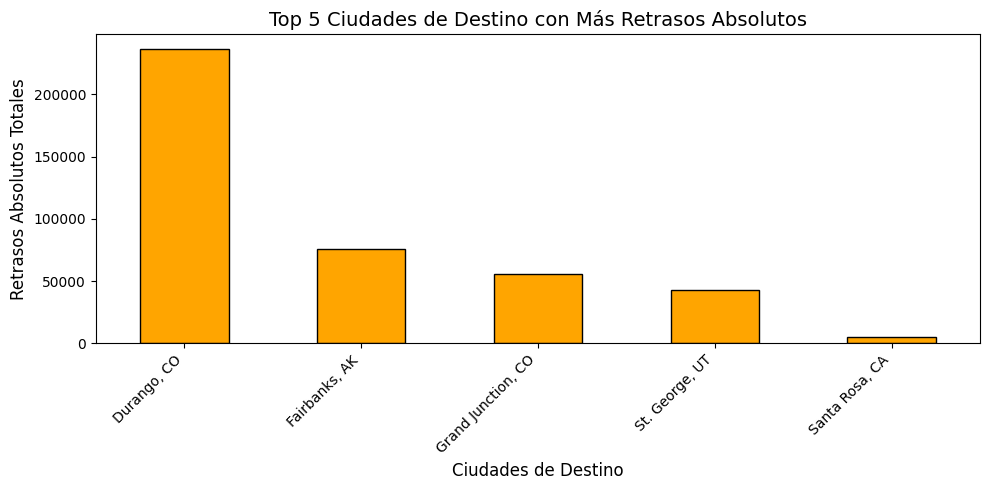

In [60]:
# 5 origin/destination cities with the most delays (highest absolute delay)
ciudades_origen_mas_retrasos = df_flights.groupby('ORIGIN_CITY_NAME')['retrasoabsoluto'].sum().sort_values(ascending=False).head(5)
ciudades_destino_mas_retrasos = df_flights.groupby('DEST_CITY_NAME')['retrasoabsoluto'].sum().sort_values(ascending=False).head(5)
print(ciudades_origen_mas_retrasos)
print(ciudades_destino_mas_retrasos)

plt.figure(figsize=(10, 5))
ciudades_origen_mas_retrasos.plot(kind='bar', color='coral', edgecolor='black')
plt.title("Top 5 Ciudades de Origen con Más Retrasos Absolutos", fontsize=14)
plt.ylabel("Retrasos Absolutos Totales", fontsize=12)
plt.xlabel("Ciudades de Origen", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 5))
ciudades_destino_mas_retrasos.plot(kind='bar', color='orange', edgecolor='black')
plt.title("Top 5 Ciudades de Destino con Más Retrasos Absolutos", fontsize=14)
plt.ylabel("Retrasos Absolutos Totales", fontsize=12)
plt.xlabel("Ciudades de Destino", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


<a id="basic"></a>
# <b><span style='color:#white; font-size:40%' >Step 4.2 |</span><span style='color:#0492C2; font-size:40%' > Conclusions |</span></b></span><span style='color:#63C5DA; font-size:35%' >  

<div style="border-radius:10px; padding: 15px; background-color: #4da8cf; font-size:115%; text-align:left">


- __BUSINESS NEEDS__ Improve flight- air connections that present a long delays

- __ANALYSIS RESULTS__ 

    * The flight with the longest delay is Phoenix, AZ - Durango, CO
    * The flight with the shortest delay is Chicago, IL - New York, NY

- __SOLUTIONS__ 

    * Adjust schedules
    * Explore alternate routing:
    * Dedicated extra resources

- __NEXT STEPS__ 

    * Analyze the reasons of the delays (weather, aircraft, passenger volume etc)
    * Perform a root-cause analysis of delays for the Phoenix-Durango route in order to improve the long delays
    * Analyze the success of the Chicago-New York route to identify transferable strategies to other airports.

<div style="border-radius:10px; padding: 15px; background-color: #4da8cf; font-size:115%; text-align:left">


- __BUSINESS NEEDS__ Improve airport efficiency.


- __ANALYSIS RESULTS__ 

    * The month with the most delays is February
    * The day of the week with the most delays is Saturday

- __SOLUTIONS__ 

    * Staff Preparedness
    * Winter Operations Optimization:Create contingency plans for severe weather, including backup staffing and rebooking policies.

- __NEXT STEPS__ 

    * Dive Deep detail by airport in order to improve customer satisfaction
    * Analyze the specific causes of delays in February and Saturdays (e.g., winter season, staffing, maintenance).
    * Identify the peak times within February and Saturdays to target improvement
   

<div style="border-radius:10px; padding: 15px; background-color: #4da8cf; font-size:115%; text-align:left">


- __BUSINESS NEEDS__ Reduce flight delays

- __ANALYSIS RESULTS__ 

    * Origin cities with significant delays :Brunswick, GA; Santa Rosa, CA; Helena, MT
    * Destination cities with the highest absolute delays (e.g., Durango, CO; Fairbanks, AK; Grand Junction, CO)..

- __SOLUTIONS__ 

    * Collaborate with Airports and Airlines in those airports.
    * Test alternate flight paths or scheduling adjustments for delay-heavy routes

- __NEXT STEPS__ 

    * Identify if delays are due to external factors (e.g., weather) or internal inefficiencies

   




 __INFO: DELAYS POLICY IN US__ 


-  DELAYED FLIGHTS POLICY:
   The refund policy for flight delays in the U.S. varies based on the airline, as there is no federal law requiring airlines to compensate passengers for delays. U.S. airlines are not required to offer refunds for delays unless the delay results in a significant schedule change, and the passenger chooses not to take the flight.
   Some airlines may provide vouchers, meal compensation, or hotel stays for long delays (e.g., 4+ hours), but this is not universal.
   
   For delays while on the tarmac, the Department of Transportation (DOT) mandates:Domestic flights: Passengers must be allowed to deplane after 3 hours unless it is unsafe.
   International flights: The limit is 4 hours.
   Airlines must provide water, snacks, and working lavatories during tarmac delays.

- EXAMPLES AIRLINES
   * American Airlines: Refunds are provided if a delay exceeds 4 hours and the passenger chooses not to travel.
   * Delta Airlines: Refunds or credits are offered for delays beyond a certain threshold (varies by ticket type and delay duration).
   * United Airlines: Refunds are offered for "significant delays," usually defined as a delay of 6+ hours or a major schedule change.
   
   
   

<div style="border-radius:10px; padding: 15px; background-color: #4da8cf; font-size:115%; text-align:left">


- __BUSINESS NEEDS__ Reduce operating costs for airlines

- __NEXT STEPS__ 

    * Add the airline column and calculate how much money has been spent on refunds
    
   